### Run in Google Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mathguy-ars/nfl-qb-stats-analysis/blob/main/maye_stats_notebook.ipynb)



#Introduction

A comparative analysis of Drake Maye’s passing performance using a small dataset of other quarterbacks as well as the current top 5 quarterbacks in the league. All statistics and comparisons are through the first 14 weeks of the 2025 season. The goal is to evaluate Drake Maye on key metrics and understand how he stacks up against both his peers and the league’s leading passers.

# Initialization for Colab and Github

In [ ]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/nfl-qb-stats-analysis'):
        !git clone https://github.com/mathguy-ars/nfl-qb-stats-analysis.git

    # Change to project directory
    os.chdir('/content/nfl-qb-stats-analysis')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Current working directory: /content/drive/MyDrive/QB-final


# Imports and setup

This notebook uses pandas, matplotlib, and re (regular expressions).

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import re

# Enable inline plots
%matplotlib inline


# Column Cleaning and Conversion

Force removal of whitespaces and other unicode characters which interfere with proper usage of csv files

In [ ]:
def sanitize_columns(df):
    """
    Clean column names of invisible characters and whitespace.
    """
    df.columns = df.columns.map(lambda x: re.sub(r'[^\x20-\x7E]', '', x).strip())
    return df

def force_numeric(df):
    """
    Convert all non-Player columns to numeric.
    """
    for col in df.columns:
        if col != "Player":
            df[col] = pd.to_numeric(df[col], errors="coerce")
    return df


# Load Data

Run this cell to load the csv files

In [ ]:
# Load CSVs
qb_peers = sanitize_columns(pd.read_csv("/content/nfl-qb-stats-analysis/data_raw/qb_stats.csv"))
qb_top5 = sanitize_columns(pd.read_csv("/content/nfl-qb-stats-analysis/data_raw/qb_stats.csv"))
qb_agg = sanitize_columns(pd.read_csv("/content/nfl-qb-stats-analysis/data_raw/qb_stats_agg.csv"))

qb_peers = force_numeric(qb_peers)
qb_top5 = force_numeric(qb_top5)
qb_agg = force_numeric(qb_agg)

# Display initial datasets

# Full dataframe of nfl starting qbs with at least 10 starts
print("\n--- Aggregated QB Stats ---")
display(qb_agg)

# Reduced dataframe with random sample of qbs plus Josh Allen
print("\n--- Peer QB Stats ---")
display(qb_peers.head())

# Reduced dataframe with top 5 qbs through 14 weeks of 2025 season
print("\n--- Top 5 QB Stats ---")
display(qb_top5.head())



--- Aggregated QB Stats ---


,Player,Attempts,Completions,Yards,CompletionPct,Interceptions,QBR,Touchdowns
0,Drake Maye,386,276,3412,71.5,6,72.2,23
1,Justin Herbert,422,277,2981,65.6,11,58.3,22
2,Patrick Mahomes,474,299,3398,63.1,10,69.4,22
3,Baker Mayfield,417,257,2722,61.6,6,60.0,20
4,Sam Darnold,354,241,3162,68.1,11,64.4,22
5,Trevor Lawrence,425,253,2880,59.5,11,47.1,18
6,Josh Allen,265,378,3083,70.1,10,65.2,22
7,Daniel Jones,384,261,3101,68.0,8,64.1,19
8,Geno Smith,397,266,2648,67.0,14,32.5,16
9,Tua Tagovailoa,356,238,2407,66.9,14,38.4,18



--- Peer QB Stats ---


,Player,Attempts,Completions,Yards,CompletionPct,Touchdowns
0,Drake Maye,386,276,3412,71.5,23
1,Dak Prescott,437,303,3261,69.3,25
2,Patrick Mahomes,441,285,3238,64.6,22
3,Matthew Stafford,401,266,3073,66.3,32
4,Daniel Jones,370,251,3041,67.8,19



--- Top 5 QB Stats ---


,Player,Attempts,Completions,Yards,CompletionPct,Touchdowns,PasserRating
0,Drake Maye,386,276,3412,71.5,23,111.884715
1,Dak Prescott,437,303,3261,69.3,25,100.198003
2,Patrick Mahomes,441,285,3238,64.6,22,91.200774
3,Matthew Stafford,401,266,3073,66.3,32,113.136574
4,Daniel Jones,370,251,3041,67.8,19,100.184462


# Compute Metrics

Passer Rating function

In [ ]:
def passer_rating(att, comp, yards, td, interceptions):
    """
    Calculate NFL passer rating (0-158.3)
    Formula:
    a = Completion percentage factor
    b = Yards per attempt factor
    c = Touchdown per attempt factor
    d = Interception per attempt factor
    """
    if att == 0:
        return 0
    a = ((comp / att) - 0.3) * 5 # completion percentage
    b = ((yards / att) - 3) * 0.25 # YPA
    c = (td / att) * 20 # touchdowns per passing attempt
    d = 2.375 - ((interceptions / att) * 25) # interceptions
    a = max(0, min(a, 2.375))
    b = max(0, min(b, 2.375))
    c = max(0, min(c, 2.375))
    d = max(0, min(d, 2.375))
    return ((a + b + c + d) / 6) * 100


Yards Per Attempt (YPA) and Touchdowns Per Attempt (TD_per_att)

In [ ]:
def compute_metrics(df):
    """
    Compute additional metrics for analysis:
    YPA: Yards per Attempt
    TD_per_Att: Touchdowns per Attempt
    PasserRating: NFL passer rating
    """
    df['YPA'] = df['Yards'] / df['Attempts']
    df['TD_per_Att'] = df['Touchdowns'] / df['Attempts']

    # Find the interceptions column automatically
    int_cols = [c for c in df.columns if "interception" in c.lower()]
    if not int_cols:
        print(" ")
        df['PasserRating'] = float('nan')
        return df

    # Make sure columns are converted
    int_col = int_cols[0]
    for col in ['Attempts', 'Completions', 'Yards', 'Touchdowns', int_col]:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    # Compute passer rating for each row
    df['PasserRating'] = df.apply(
        lambda row: passer_rating(
            row['Attempts'], row['Completions'], row['Yards'], row['Touchdowns'], row[int_col]
        ),
        axis=1
    )
    return df

# Apply metrics
qb_peers = compute_metrics(qb_peers)
qb_top5 = compute_metrics(qb_top5)
qb_agg = compute_metrics(qb_agg)

# Display results with newly calculated metrics: passer rating, YPA, TD_per_Att

# New dataframe with calculated metrics displayed
print("\n--- Aggregated QB Stats with Metrics ---")
display(qb_agg)

# New reduced dataframe with calculated metrics displayed
print("\n--- Peer QB Stats with Metrics ---")
display(qb_peers.head())

# New reduced dataframe with calculated metrics displayed
print("\n--- Top 5 QB Stats with Metrics ---")
display(qb_top5.head())


 
 

--- Aggregated QB Stats with Metrics ---


,Player,Attempts,Completions,Yards,CompletionPct,Interceptions,QBR,Touchdowns,YPA,TD_per_Att,PasserRating
0,Drake Maye,386,276,3412,71.5,6,72.2,23,8.839378,0.059585,111.884715
1,Justin Herbert,422,277,2981,65.6,11,58.3,22,7.063981,0.052133,92.733017
2,Patrick Mahomes,474,299,3398,63.1,10,69.4,22,7.168776,0.046414,91.200774
3,Baker Mayfield,417,257,2722,61.6,6,60.0,20,6.527578,0.047962,90.632494
4,Sam Darnold,354,241,3162,68.1,11,64.4,22,8.932203,0.062147,103.801789
5,Trevor Lawrence,425,253,2880,59.5,11,47.1,18,6.776471,0.042353,83.259804
6,Josh Allen,265,378,3083,70.1,10,65.2,22,11.633962,0.083019,127.091195
7,Daniel Jones,384,261,3101,68.0,8,64.1,19,8.075521,0.049479,100.184462
8,Geno Smith,397,266,2648,67.0,14,32.5,16,6.670025,0.040302,84.451092
9,Tua Tagovailoa,356,238,2407,66.9,14,38.4,18,6.761236,0.050562,86.434925



--- Peer QB Stats with Metrics ---


,Player,Attempts,Completions,Yards,CompletionPct,Touchdowns,YPA,TD_per_Att,PasserRating
0,Drake Maye,386,276,3412,71.5,23,8.839378,0.059585,NaN
1,Dak Prescott,437,303,3261,69.3,25,7.462243,0.057208,NaN
2,Patrick Mahomes,441,285,3238,64.6,22,7.342404,0.049887,NaN
3,Matthew Stafford,401,266,3073,66.3,32,7.663342,0.079800,NaN
4,Daniel Jones,370,251,3041,67.8,19,8.218919,0.051351,NaN



--- Top 5 QB Stats with Metrics ---


,Player,Attempts,Completions,Yards,CompletionPct,Touchdowns,PasserRating,YPA,TD_per_Att
0,Drake Maye,386,276,3412,71.5,23,NaN,8.839378,0.059585
1,Dak Prescott,437,303,3261,69.3,25,NaN,7.462243,0.057208
2,Patrick Mahomes,441,285,3238,64.6,22,NaN,7.342404,0.049887
3,Matthew Stafford,401,266,3073,66.3,32,NaN,7.663342,0.079800
4,Daniel Jones,370,251,3041,67.8,19,NaN,8.218919,0.051351


# Rankings Function

Rank players based on the metrics specified below and display the rankings.

In [ ]:
def display_ranking(df, column, title):
    """
    Display a ranking table sorted by a metric.
    """
    print(f"\n Ranking by {title}")
    ranked = df.sort_values(by=column, ascending=False)
    display(ranked[['Player', column]])


# Peer Rankings

Rank the peer group of players and include Drake Maye

In [ ]:
# Display rankings for the peer group
peer_metrics = [
    ('CompletionPct', 'Completion %'),
    ('YPA', 'Yards per Attempt'),
    ('TD_per_Att', 'TD per Attempt')
]

print("Peer Group Rankings")
for metric, label in peer_metrics:
    display_ranking(qb_peers, metric, label)


Peer Group Rankings

 Ranking by Completion %


,Player,CompletionPct
0,Drake Maye,71.5
5,Jared Goff,69.8
1,Dak Prescott,69.3
4,Daniel Jones,67.8
3,Matthew Stafford,66.3
2,Patrick Mahomes,64.6



 Ranking by Yards per Attempt


,Player,YPA
0,Drake Maye,8.839378
4,Daniel Jones,8.218919
5,Jared Goff,8.002646
3,Matthew Stafford,7.663342
1,Dak Prescott,7.462243
2,Patrick Mahomes,7.342404



 Ranking by TD per Attempt


,Player,TD_per_Att
3,Matthew Stafford,0.079800
5,Jared Goff,0.066138
0,Drake Maye,0.059585
1,Dak Prescott,0.057208
4,Daniel Jones,0.051351
2,Patrick Mahomes,0.049887


# Top 5 Rankings

Rank the top 5 players and include Drake Maye

In [ ]:
# Display rankings for the top 5 QBs
top5_metrics = [
    ('CompletionPct', 'Completion %'),
    ('YPA', 'Yards per Attempt'),
    ('TD_per_Att', 'TD per Attempt')
]

print("Top 5 QB Rankings")
for metric, label in top5_metrics:
    display_ranking(qb_top5, metric, label)


Top 5 QB Rankings

 Ranking by Completion %


,Player,CompletionPct
0,Drake Maye,71.5
5,Jared Goff,69.8
1,Dak Prescott,69.3
4,Daniel Jones,67.8
3,Matthew Stafford,66.3
2,Patrick Mahomes,64.6



 Ranking by Yards per Attempt


,Player,YPA
0,Drake Maye,8.839378
4,Daniel Jones,8.218919
5,Jared Goff,8.002646
3,Matthew Stafford,7.663342
1,Dak Prescott,7.462243
2,Patrick Mahomes,7.342404



 Ranking by TD per Attempt


,Player,TD_per_Att
3,Matthew Stafford,0.079800
5,Jared Goff,0.066138
0,Drake Maye,0.059585
1,Dak Prescott,0.057208
4,Daniel Jones,0.051351
2,Patrick Mahomes,0.049887


# Visualization Functions

Visualize the data with histograms, bar charts, and scatterplots

In [ ]:
def top_n_with_drake(df, metric, n=6):
    """
    Select top N players, always including Drake Maye
    """
    top = df.sort_values(by=metric, ascending=False).head(n)
    if 'Drake Maye' in df['Player'].values and 'Drake Maye' not in top['Player'].values:
        top = pd.concat([top, df[df['Player']=='Drake Maye']])
    return top.drop_duplicates(subset='Player')

def plot_bar(df, column, title, ylabel):
    """
    Simple bar chart for visual comparison.
    Shows top players for a given metric.
    """
    plt.figure(figsize=(8,5))
    plt.bar(df['Player'], df[column], color='skyblue')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_scatter(df, x_col, y_col, title):
    """
    Scatterplot comparing two metrics.
    Annotates each point with the player name.
    """
    plt.figure(figsize=(8,5))
    plt.scatter(df[x_col], df[y_col], color='green', s=100)
    for i, player in enumerate(df['Player']):
        plt.text(df[x_col].iloc[i]+0.1, df[y_col].iloc[i]+0.1, player, fontsize=9)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_hist_with_drake(df, column, title, bins=5):
    """
    Histogram of a metric with Drake Maye highlighted.
    """
    plt.figure(figsize=(8,5))
    plt.hist(df[column], bins=bins, color='orange', edgecolor='black')
    if 'Drake Maye' in df['Player'].values:
        drake_val = df[df['Player']=='Drake Maye'][column].values[0]
        plt.axvline(drake_val, color='red', linestyle='dashed', linewidth=2, label='Drake Maye')
        plt.legend()
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


# Peer Visualizations

Visualizations of peer group rankings.

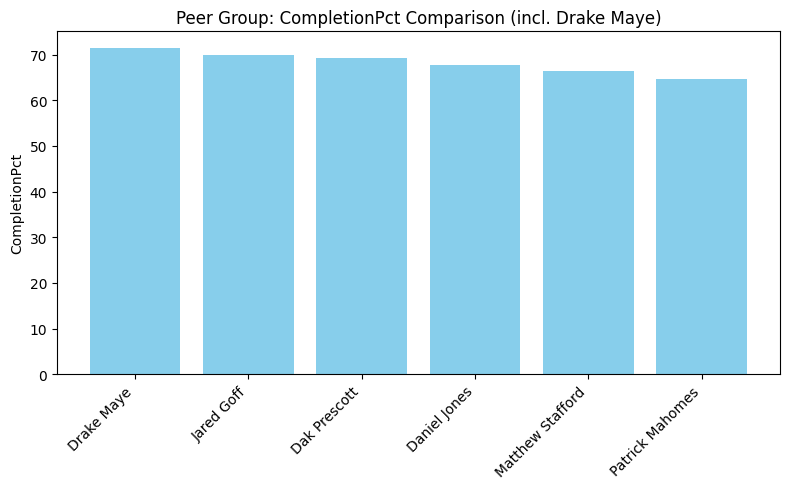

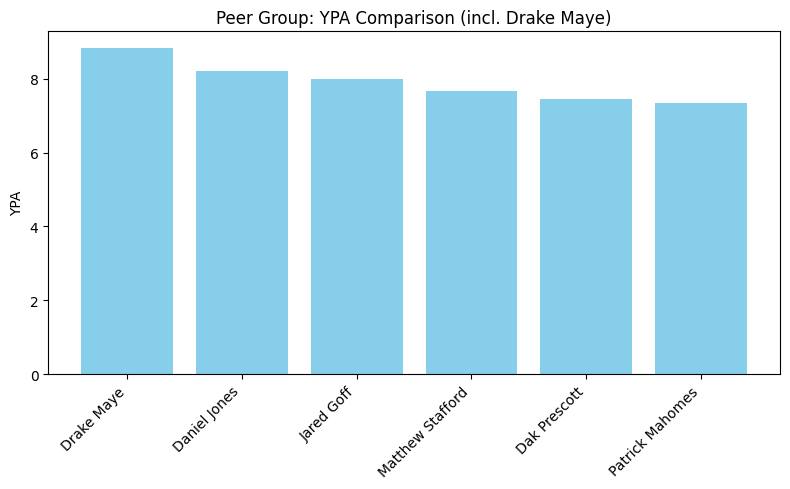

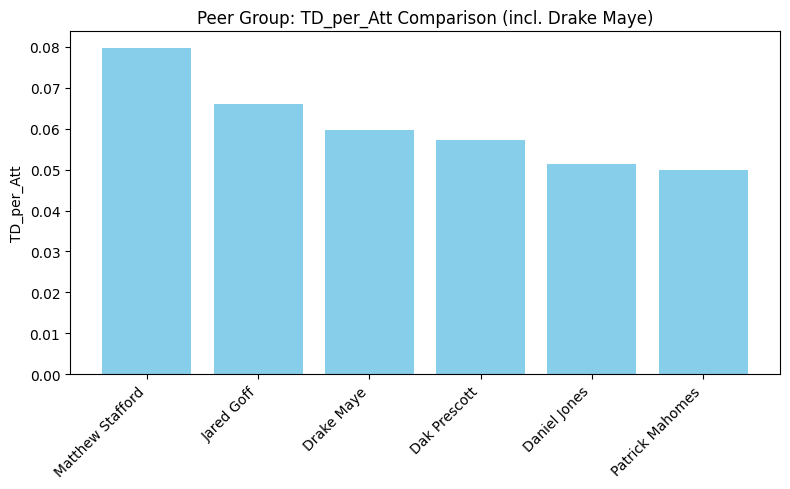

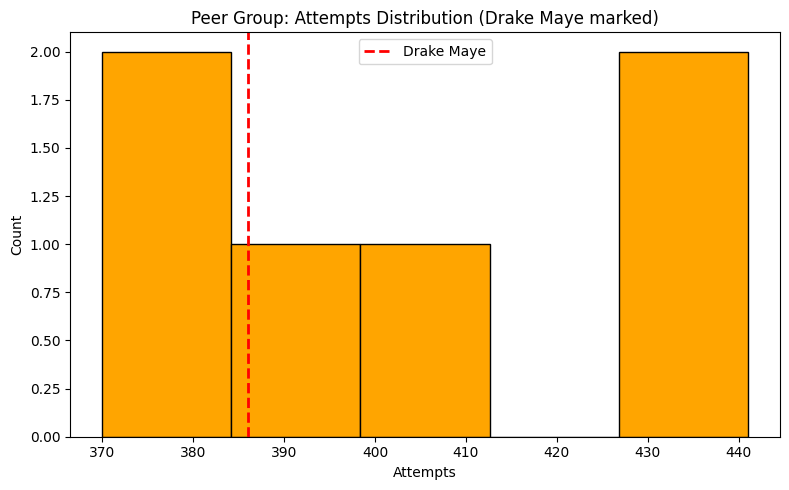

In [ ]:
# Bar charts for peer group metrics
peer_metrics = ['CompletionPct', 'YPA', 'TD_per_Att']
for metric in peer_metrics:
    df_top = top_n_with_drake(qb_peers, metric)
    plot_bar(df_top, metric, f"Peer Group: {metric} Comparison (incl. Drake Maye)", metric)

# Histogram for peer attempts with Drake Maye highlighted
plot_hist_with_drake(qb_peers, 'Attempts', "Peer Group: Attempts Distribution (Drake Maye marked)")


# Top 5 Visualizations

Visualizations of top 5 rankings

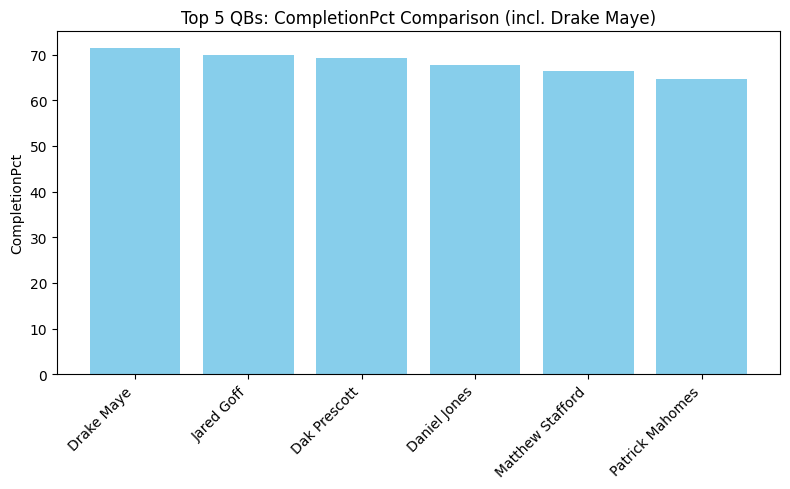

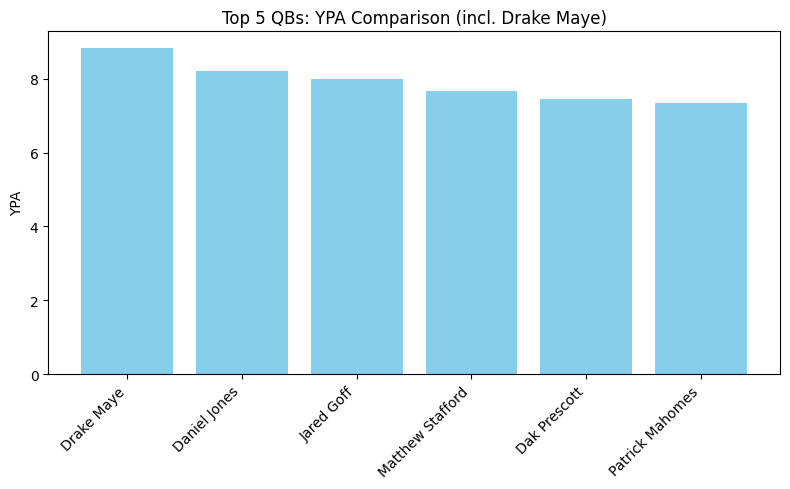

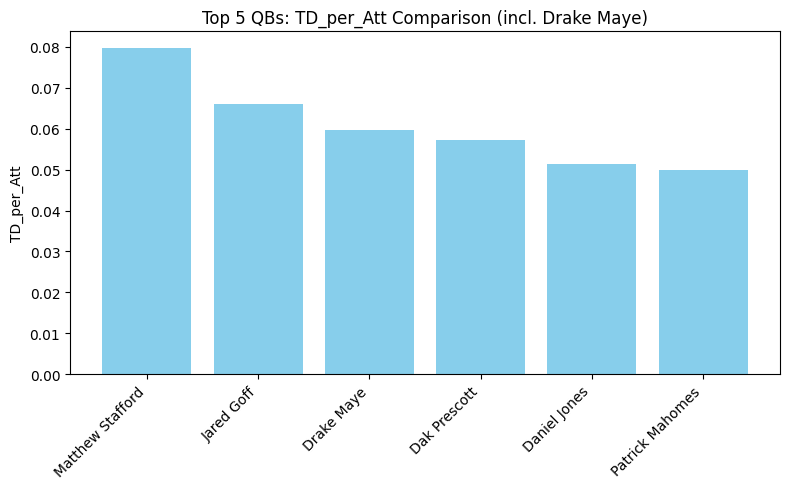

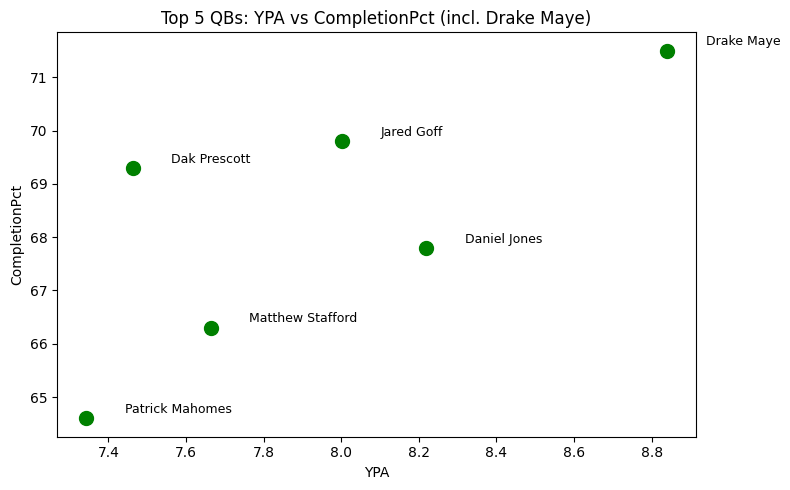

In [ ]:
# Bar charts for Top 5 QB metrics
top5_metrics = ['CompletionPct', 'YPA', 'TD_per_Att']
for metric in top5_metrics:
    df_top = top_n_with_drake(qb_top5, metric)
    plot_bar(df_top, metric, f"Top 5 QBs: {metric} Comparison (incl. Drake Maye)", metric)

# Scatterplot: YPA vs CompletionPct
df_top = top_n_with_drake(qb_top5, 'CompletionPct')
plot_scatter(df_top, 'YPA', 'CompletionPct', "Top 5 QBs: YPA vs CompletionPct (incl. Drake Maye)")


# Aggregated Visualizations

Visualizations of the aggregated qb stat sheet

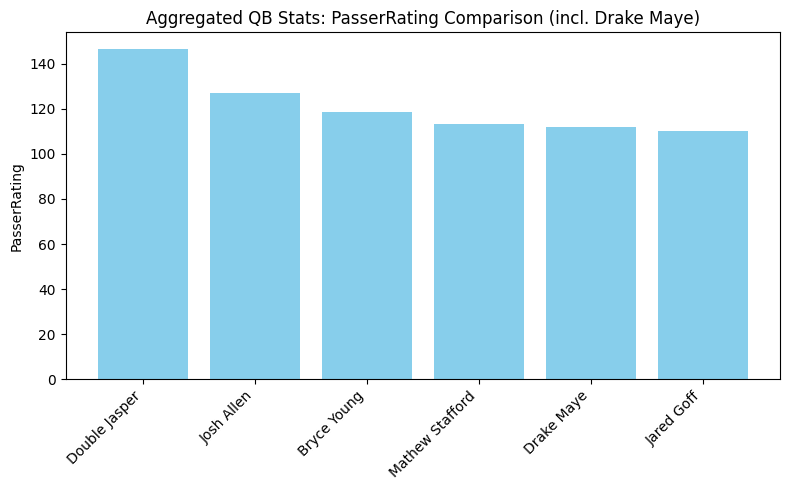

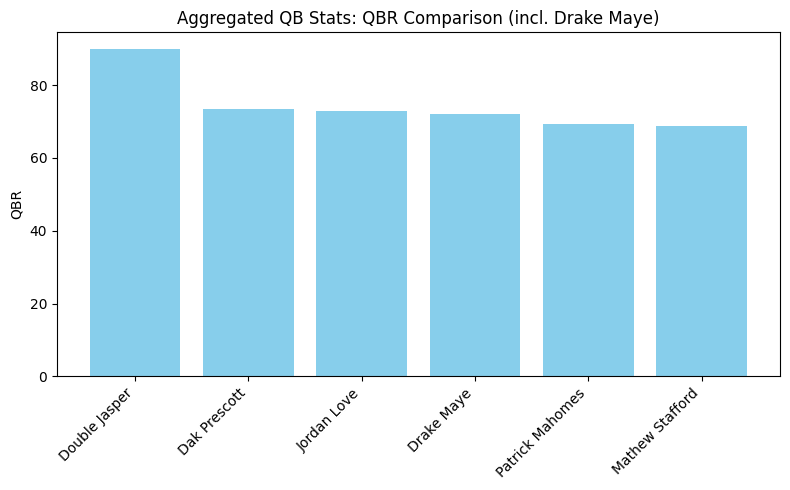

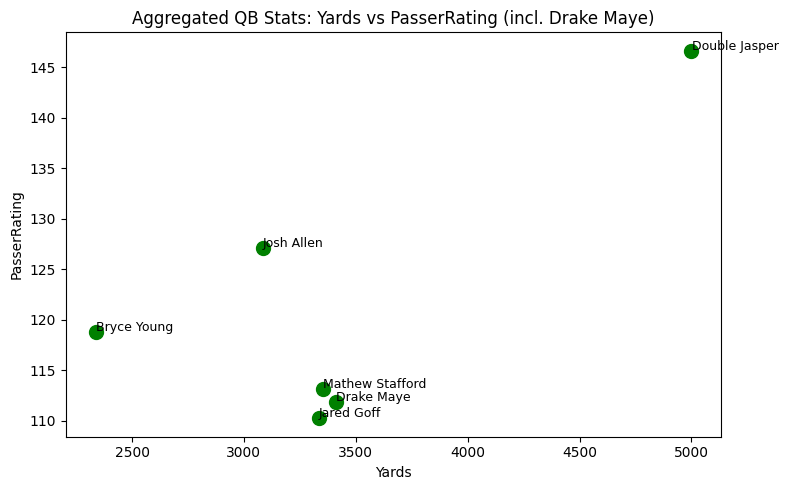

In [ ]:
# Double Jasper is not a real player. It is used to demonstrate near-perfect statistics for a qb for contextual purposes
# Bar charts for aggregated QB metrics
agg_metrics_bar = ['PasserRating', 'QBR']
for metric in agg_metrics_bar:
    df_top = top_n_with_drake(qb_agg, metric)
    plot_bar(df_top, metric, f"Aggregated QB Stats: {metric} Comparison (incl. Drake Maye)", metric)

# scatterplot: yards vs PasserRating
df_top = top_n_with_drake(qb_agg, 'PasserRating')
plot_scatter(df_top, 'Yards', 'PasserRating', "Aggregated QB Stats: Yards vs PasserRating (incl. Drake Maye)")


#Conclusion

The primary metrics used in evaluating quarterback play show that Drake Maye is having a stellar season. His decision making is leading to completions which are highlighted by yardage gains and points. The ultimate deciding factor when examining a quarterback's effectiveness is points and his play is leading to scoring opportunities which are being converted into points for the team. The only metric used in deciding the winner and loser of a contest are the amount of points scored by each side. He is a top 3 quarterback in terms of the most commonly used markers for evaluating play. Thus to summarize my findings, Drake Maye is very deserving of being in the season’s best quarterbacks conversation. His total number of touchdowns puts him in the top handful of quarterbacks this season. His low interception total indicates that he is generally finishing drives in the most fruitful ways possible whether the drive ends with a field goal, touchdown, or punt. It is critical for quarterbacks to retain the ball until one of these three true outcomes is achieved. Mathew Stafford, a veteran player, has thrown more touchdowns as has Dak Prescott. But more touchdowns does not necessarily always translate to more wins. The Patriots have amassed 11 wins in 13 games played. Drake Maye is a huge reason why they have been so successful this year. The Patriots have been without a franchise quarterback for several years since Tom Brady's departure. Drake Maye is that franchise quarterback and yes he is that good!